In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, '..')

from Approximators import SKApproximator, AAAApproximator, PolelessBarycentric
import Approximators.Bernstein.CauchySimplex as Bernstein
import Approximators.BernsteinPP.CauchySimplex as BernsteinPP
import Approximators.WeightedBernstein.CauchySimplex as WeightedBernstein

In [3]:
import Approximators
Approximators.ignore_warnings()

In [4]:
n = 6
m = n

approximators = {'Sanathan-Koerner': SKApproximator(n, m),
                 'AAA': AAAApproximator(n + 1, m + 1),
                 'Bernstein': Bernstein(n, m, max_iter=500),
                 'Poless Barycentric': PolelessBarycentric(n + 1, m + 1),
                 'Polynomial': Bernstein(2 * n, 0)}

# Fake Data

In [5]:
target_functions = [lambda x: 1 / (50 * ((x - 0.5) ** 2) + 1), 
                    lambda x: abs(10 * (x - 0.5)), 
                    lambda x: np.arctan(10 * (x - 0.5))]

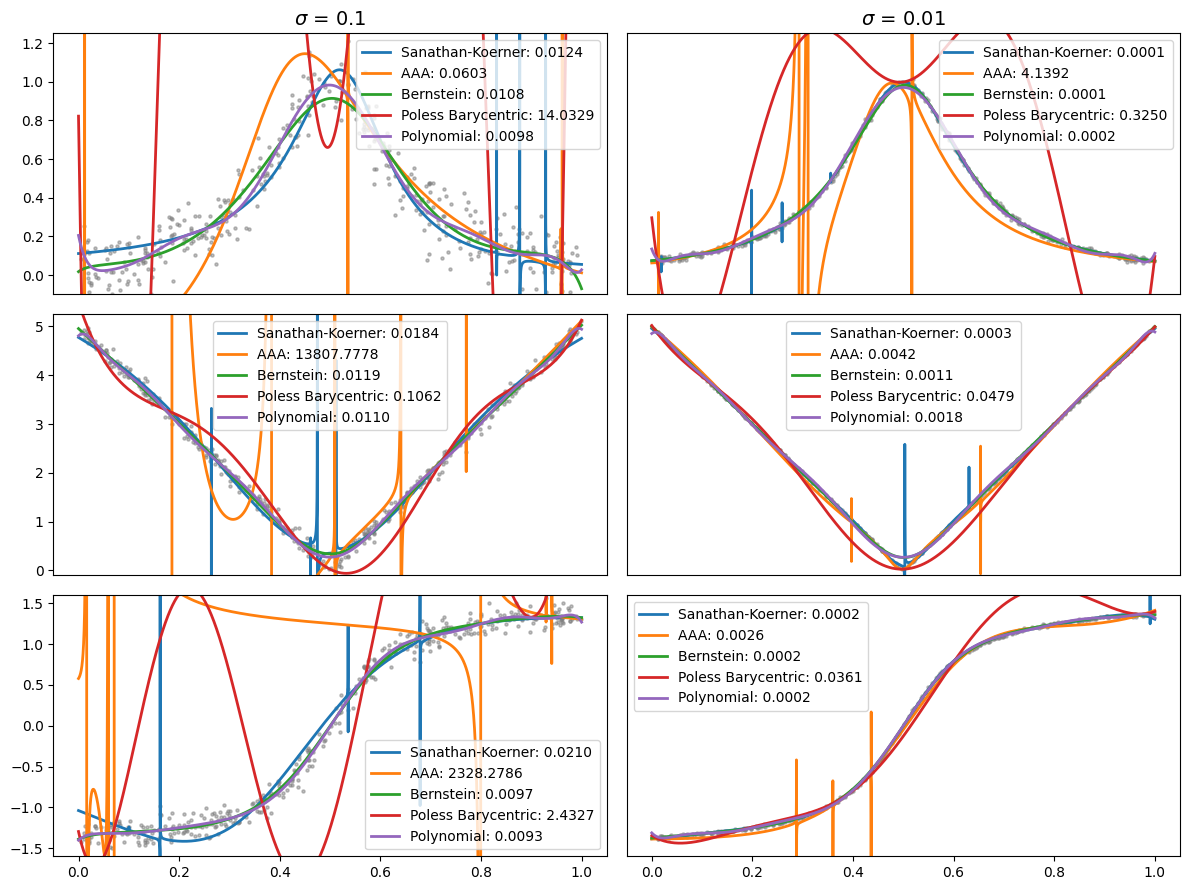

In [6]:
np.random.seed(0)

linestyles = ['solid', 'dotted', 'dashed', 'dashdot']

noise_levels = [1e-1, 1e-2]

plt.figure(figsize=(12, 9))

N = 400
x = np.random.rand(N)

count = 0
x_vals = np.linspace(0, 1, 10_001)
for row, f in enumerate(target_functions):
    for col, noise in enumerate(noise_levels):
        plt.subplot(len(target_functions), 2, count + 1)
        
        y = f(x) + np.random.normal(0, noise, size=N)
        
        plt.scatter(x, y, alpha=0.5, s=5, color='grey')
        
        for name, method in approximators.items():
            method.fit(x, y)
            
            mse = np.mean((method(x) - y) ** 2)
            plt.plot(x_vals, method(x_vals), label=f"{name}: {mse:.4f}", linewidth=2)

        count += 1
        
        plt.legend()
        
        if col > 0:
            plt.yticks([], [])
        
        if row == 0:
            plt.ylim(-0.1, 1.25)
            plt.xticks([], [])
            plt.title("$\sigma$ = " + f"{noise}", fontsize=14)
            
        elif row == 1:
            plt.ylim(-0.1, 5.25)
            plt.xticks([], [])
            
        else:
            plt.ylim(-1.6, 1.6)
        
plt.tight_layout()

plt.savefig('fake_data.png', pad_inches=0, dpi=120)